In [30]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [31]:
df=pd.read_csv('dataset_group.csv')


In [32]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [6]:
df.duplicated().sum()


4730

In [7]:
df.isna().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [8]:
df.Date = pd.to_datetime(df.Date)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


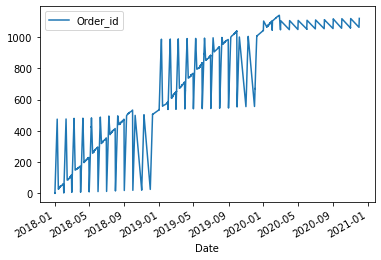

In [10]:
df.plot(x='Date')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

Text(0, 0.5, 'Distribution')

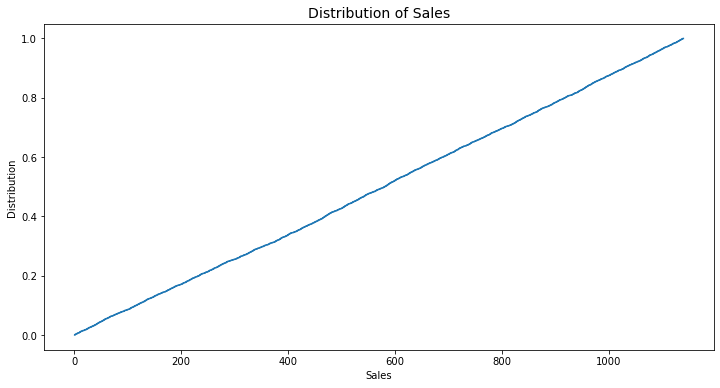

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Order_id'])
plt.plot(cdf.x, cdf.y, label = "statmodels")
plt.title('Distribution of Sales', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution')

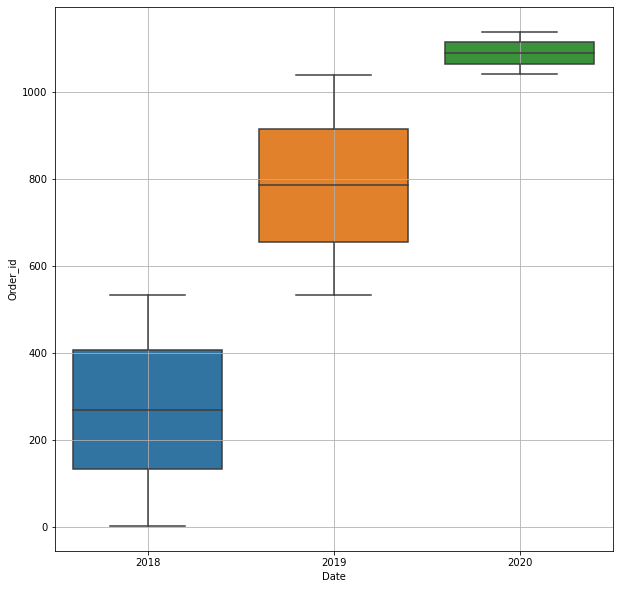

In [12]:
df = df.set_index('Date')
sns.boxplot(x = df.index.year,y = df['Order_id'])
plt.rcParams['figure.figsize'] = (10, 10)
plt.grid();

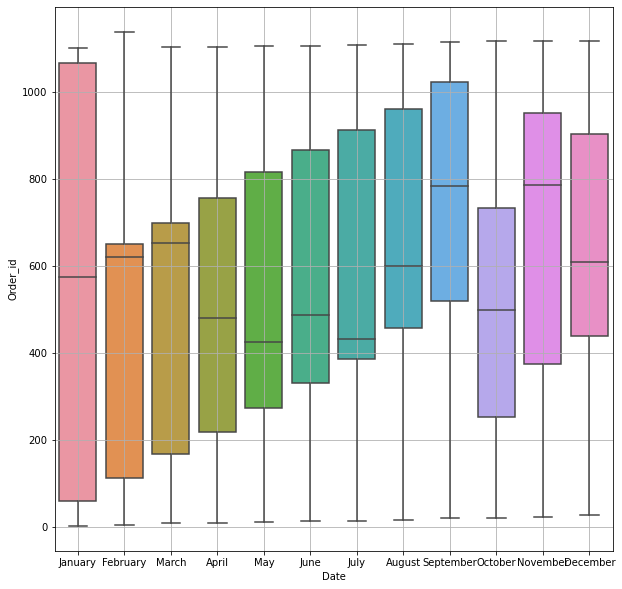

In [13]:
sns.boxplot(x = df.index.month_name(),y = df['Order_id'])
plt.rcParams['figure.figsize'] = (10, 10)
plt.grid();

In [14]:
import pandas as pd
monthly_sales_across_years = pd.pivot_table(df, values = 'Order_id', columns = df.index.year, index = df.index.month)
monthly_sales_across_years

Date,2018,2019,2020
Date,,,
1,89.125609,632.501699,1081.015815
2,152.317186,651.580328,1120.710280
3,192.152731,699.412500,1064.000000
4,235.959402,771.545455,1089.533333
5,271.914336,807.997906,1060.687500
6,299.839923,835.753138,1058.311475
7,345.662681,863.277293,1084.321429
8,421.204698,872.293137,1101.020408
9,425.521368,920.856092,1093.545455


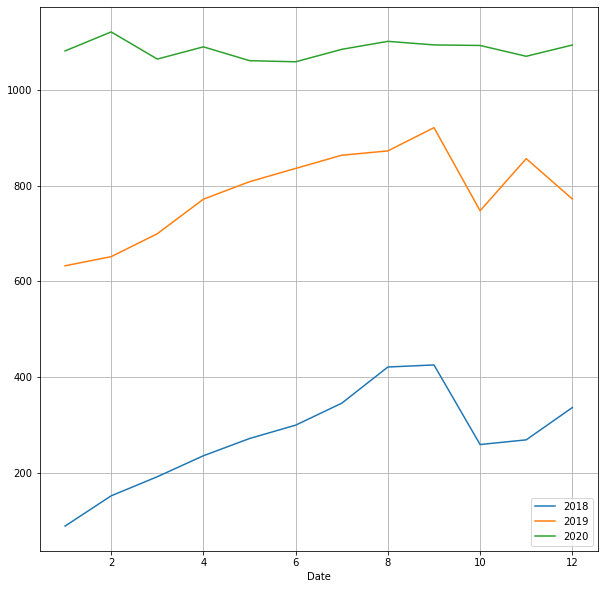

In [15]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\MB Reddy\anaconda3\lib\site-packages\pandas\plo

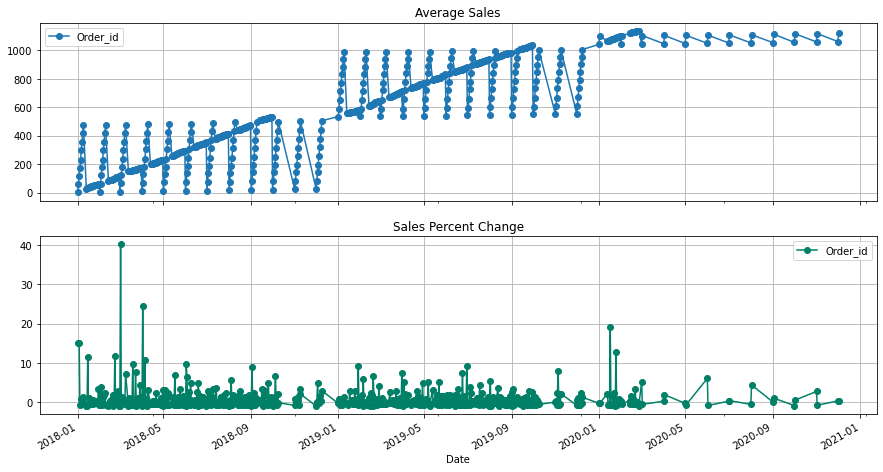

In [16]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Order_id"].mean()
pct_change = df.groupby(df.index)["Order_id"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

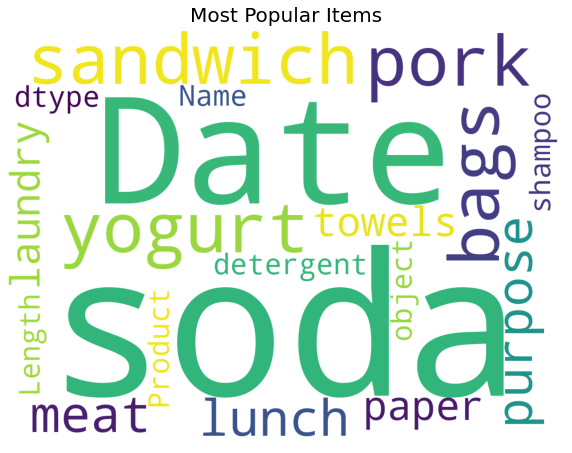

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 900, max_words = 121).generate(str(df['Product']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [18]:
df['Product'] = df['Product'].str.lower()


In [19]:
df = df.drop(df[df.Product == 'none'].index)


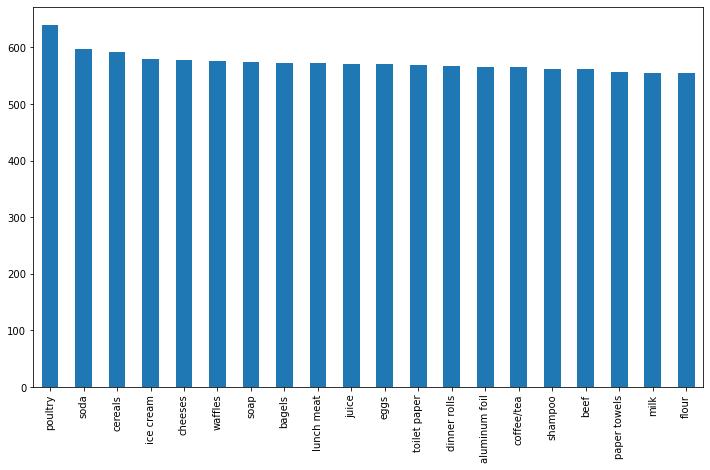

In [20]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [21]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')


In [22]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [23]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [24]:
basket=basket.applymap(encode_zero_one)
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(ketchup, mixes, spaghetti sauce, pork, soap, ..."
610568,0.011414,"(ketchup, waffles, mixes, spaghetti sauce, soa..."
610569,0.010536,"(sandwich loaves, laundry detergent, soap, lun..."
610570,0.011414,"(yogurt, mixes, milk, sandwich bags, lunch mea..."


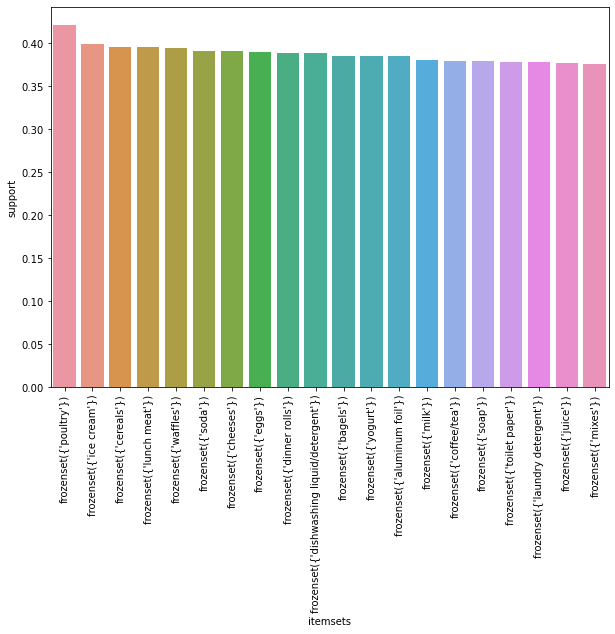

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [26]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 


In [27]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21916458,"(ketchup, sugar, sandwich bags, all- purpose)","(laundry detergent, soap, flour)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126
21916523,"(laundry detergent, soap, flour)","(ketchup, sugar, sandwich bags, all- purpose)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329
21907008,"(toilet paper, fruits, all- purpose, coffee/tea)","(butter, beef, cereals)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899
21907073,"(butter, beef, cereals)","(toilet paper, fruits, all- purpose, coffee/tea)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374
22026341,"(pork, milk, individual meals, ice cream)","(sandwich loaves, shampoo, cereals)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557
22026384,"(sandwich loaves, shampoo, cereals)","(pork, milk, individual meals, ice cream)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694
22029873,"(ketchup, cheeses, lunch meat, milk)","(pork, soap, coffee/tea)",0.022827,0.065847,0.011414,0.500000,7.593333,0.009910,1.868306
22029908,"(pork, soap, coffee/tea)","(ketchup, cheeses, lunch meat, milk)",0.065847,0.022827,0.011414,0.173333,7.593333,0.009910,1.182064
21916456,"(ketchup, laundry detergent, sugar, all- purpose)","(flour, soap, sandwich bags)",0.025461,0.059701,0.011414,0.448276,7.508621,0.009893,1.704291
21916525,"(flour, soap, sandwich bags)","(ketchup, laundry detergent, sugar, all- purpose)",0.059701,0.025461,0.011414,0.191176,7.508621,0.009893,1.204885


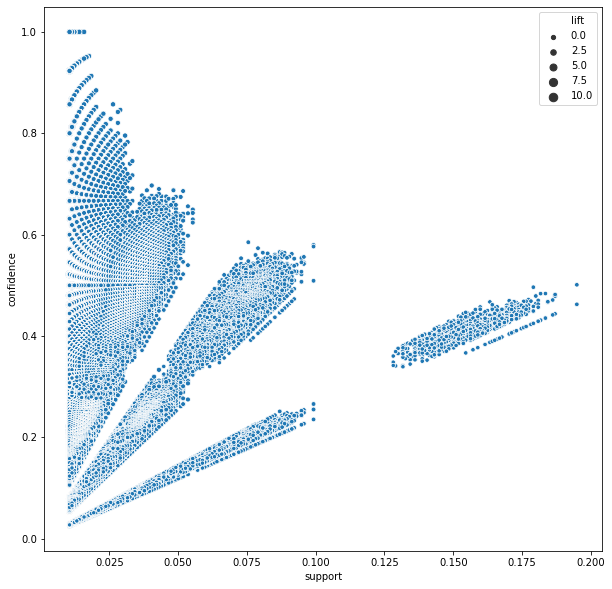

In [28]:

# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt


# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = basket)
plt.show()
